In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [2]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)

healthorg_df = pd.concat(df_ls, ignore_index = True)

# fix dates

dates = []
for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates

# filter for tweets in first half of 2020

healthorg_df = healthorg_df[healthorg_df["date"] <= datetime.date(2020,5,25)]
healthorg_df = healthorg_df[healthorg_df["date"] >= datetime.date(2020, 3, 1)]
healthorg_df = healthorg_df.drop_duplicates("tweet")

df_names = []
for line in healthorg_df["username"].unique():
    df_names.append(line)


In [ ]:
# Left News Outlets
df_path = glob.glob('./News_Outlets/Left/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

leftnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in leftnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

leftnews_df["date"] = dates

leftnews_df = leftnews_df[leftnews_df["date"] <= datetime.date(2020,6,30)]
leftnews_df = leftnews_df[leftnews_df["date"] >= datetime.date(2020,3,1)]

leftnews_df = leftnews_df.drop_duplicates("tweet")

for line in leftnews_df["username"].drop_duplicates():
    df_names.append(line)

In [3]:
# Right News Outlets
df_path = glob.glob('./News_Outlets/Right/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

rightnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in rightnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

rightnews_df["date"] = dates

rightnews_df = rightnews_df[rightnews_df["date"] <= datetime.date(2020,6,30)]
rightnews_df = rightnews_df[rightnews_df["date"] >= datetime.date(2020,3,1)]

rightnews_df = rightnews_df.drop_duplicates("tweet")

for line in rightnews_df["username"].drop_duplicates():
    df_names.append(line)

C:\Users\Maggie\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Right Individuals
df_path = glob.glob('./Right/*.csv')
trump = pd.read_csv("./Right/trump_tweets.csv") #https://www.kaggle.com/codebreaker619/donald-trump-tweets-dataset
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
        df_ls.append(covid)

    except:
        continue

right_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in right_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

right_df["date"] = dates

right_df = right_df[right_df["date"] <= datetime.date(2020, 5,25)]
right_df = right_df[right_df["date"] >= datetime.date(2020,3,1)]
right_df = right_df.drop_duplicates("tweet")

for line in right_df["username"].drop_duplicates():
    df_names.append(line)

# rename dataset columns to match others
trump["tweet"] = trump["text"]
trump["retweets_count"] = trump["retweets"]
trump["likes_count"] = trump["favorites"]
trump["retweet"] = trump["isRetweet"]
trump = trump[["tweet", "date", "retweets_count", "likes_count", "retweet"]]

#filter dates
trump_dates = trump["date"]
trump_dates_corr = []
trump_dates_corr = [d[:10] for d in trump_dates]
trump_dates_corr = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in trump_dates_corr]
trump_dates_corr = [datetime.datetime.date(d) for d in trump_dates_corr]
trump["date"] = trump_dates_corr

trump = trump[trump["date"] >= datetime.date(2020, 3, 1)]
trump = trump[trump["date"] <= datetime.date(2020, 5,25)]

trump = trump[trump['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

right_df = pd.concat([right_df, trump])

for line in right_df["username"].drop_duplicates().dropna():
    df_names.append(line)



In [5]:
# Left Individuals

df_path = glob.glob('./Left/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

left_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in left_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

left_df["date"] = dates
left_df = left_df[left_df["date"] <= datetime.date(2020, 6, 30)]
left_df = left_df[left_df["date"] >= datetime.date(2020, 3, 1)]
left_df = left_df.drop_duplicates("tweet")

for line in left_df["username"].drop_duplicates():
    df_names.append(line)

In [6]:
# Celebrities

df_path = glob.glob('./Celebrities/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

celeb_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in celeb_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

celeb_df["date"] = dates
celeb_df = celeb_df[celeb_df["date"] <= datetime.date(2020, 5,25)]
celeb_df = celeb_df[celeb_df["date"] >= datetime.date(2020, 3, 1)]
celeb_df = celeb_df.drop_duplicates("tweet")

for line in celeb_df["username"].drop_duplicates():
    df_names.append(line)

In [7]:
# fake news

CMU_fake = pd.read_csv("./fake news/cmu_fake_hydrated.csv", index_col=0)
detection_fake = pd.read_csv("./Covid19_FakeNews_Detection-master/detection_fake.csv")
#covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0) # add if want to include first two spikes, otherwise comment out and take out of list

fake = [CMU_fake, detection_fake, misinformation, fakeTweets]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2020, 3, 1)]
fake_dfs = fake_dfs[fake_dfs["date"] <= datetime.date(2020,5,25)]
fake_dfs = fake_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    fake_dfs = fake_dfs[fake_dfs["user_screen_name"].str.lower().str.contains(name) == False]


In [8]:
# real tweets

CMU_real = pd.read_csv("./fake news/cmu_real_hydrated.csv", index_col=0)
realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
detection_real = pd.read_csv("./Covid19_FakeNews_Detection-master/detection_real.csv")

real_dfs = pd.concat([realTweets, CMU_real, detection_real])

real_dfs = real_dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date
dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df
real_dfs["date"] = dates
real_dfs = real_dfs[real_dfs["date"] >= datetime.date(2020, 3, 1)]
real_dfs = real_dfs[real_dfs["date"] <= datetime.date(2020, 5,25)]
real_dfs = real_dfs.drop("created_at", axis=1)
real_dfs = real_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    real_dfs = real_dfs[real_dfs["user_screen_name"].str.lower().str.contains(name) == False]


In [9]:
%%capture
# make weighted retweets and likes columns for all datasets

# health organizations
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()
# keep likes and retweets separate, divide by followers
healthorg_df['retweets_weight'] = healthorg_df['retweets_count']/healthorg_followers
healthorg_df['likes_weight'] = healthorg_df['likes_count']/healthorg_followers

# left
file = pd.read_csv("left_followers", usecols=[0, 1])
left_followers = file["followers"].sum()
left_df['retweets_weight'] = left_df['retweets_count']/left_followers
left_df['likes_weight'] = left_df['likes_count']/left_followers

# right
file = pd.read_csv("right_followers", usecols=[0, 1])
right_followers = file["followers"].sum()
right_df['retweets_weight'] = right_df['retweets_count']/right_followers
right_df['likes_weight'] = right_df['likes_count']/right_followers

# celeb
file = pd.read_csv("celebrity_followers", usecols=[0, 1])
celeb_followers = file["followers"].sum()
celeb_df['retweets_weight'] = celeb_df['retweets_count']/celeb_followers
celeb_df['likes_weight'] = celeb_df['likes_count']/celeb_followers

# news outlets
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()
news_df['retweets_weight'] = news_df['retweets_count']/news_followers
news_df['likes_weight'] = news_df['likes_count']/news_followers

# real
real_followers = real_dfs["user_followers_count"].drop_duplicates().sum()
real_dfs['retweets_weight'] = real_dfs['retweet_count']/real_followers
real_dfs['likes_weight'] = real_dfs['favorite_count']/real_followers

# fake
fake_followers = fake_dfs["user_followers_count"].drop_duplicates().sum()
fake_dfs['retweets_weight'] = fake_dfs['retweet_count']/fake_followers
fake_dfs['likes_weight'] = fake_dfs['favorite_count']/fake_followers

In [10]:
# make timelines for each group

# health
health_engage = healthorg_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
health_likes_weight = health_engage.groupby('date')["likes_weight"].sum()
health_likes = health_engage.groupby('date')["likes_count"].sum()
health_retweets_weight = health_engage.groupby('date')["retweets_weight"].sum()
health_retweets = health_engage.groupby('date')["retweets_count"].sum()

# right
right_engage = right_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
right_likes_weight = right_engage.groupby('date')["likes_weight"].sum()
right_likes = right_engage.groupby('date')["likes_count"].sum()
right_retweets_weight = right_engage.groupby('date')["retweets_weight"].sum()
right_retweets = right_engage.groupby('date')["retweets_count"].sum()

# left
left_engage = left_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
left_likes_weight = left_engage.groupby('date')["likes_weight"].sum()
left_likes = left_engage.groupby('date')["likes_count"].sum()
left_retweets_weight = left_engage.groupby('date')["retweets_weight"].sum()
left_retweets = left_engage.groupby('date')["retweets_count"].sum()

# celeb
celeb_engage = celeb_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
celeb_likes_weight = celeb_engage.groupby('date')["likes_weight"].sum()
celeb_likes = celeb_engage.groupby('date')["likes_count"].sum()
celeb_retweets_weight = celeb_engage.groupby('date')["retweets_weight"].sum()
celeb_retweets = celeb_engage.groupby('date')["retweets_count"].sum()

# news
news_engage = news_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
news_likes_weight = news_engage.groupby('date')["likes_weight"].sum()
news_likes = news_engage.groupby('date')["likes_count"].sum()
news_retweets_weight = news_engage.groupby('date')["retweets_weight"].sum()
news_retweets = news_engage.groupby('date')["retweets_count"].sum()

# real
real_engage = real_dfs[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
real_likes_weight = real_engage.groupby('date')["likes_weight"].sum()
real_likes = real_engage.groupby('date')["favorite_count"].sum()
real_retweets_weight = real_engage.groupby('date')["retweets_weight"].sum()
real_retweets = real_engage.groupby('date')["retweet_count"].sum()

# fake
fake_engage = fake_dfs[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
fake_likes_weight = fake_engage.groupby('date')["likes_weight"].sum()
fake_likes = fake_engage.groupby('date')["favorite_count"].sum()
fake_retweets_weight = fake_engage.groupby('date')["retweets_weight"].sum()
fake_retweets = fake_engage.groupby('date')["retweet_count"].sum()



Text(0.5, 1.0, 'Fake Likes')

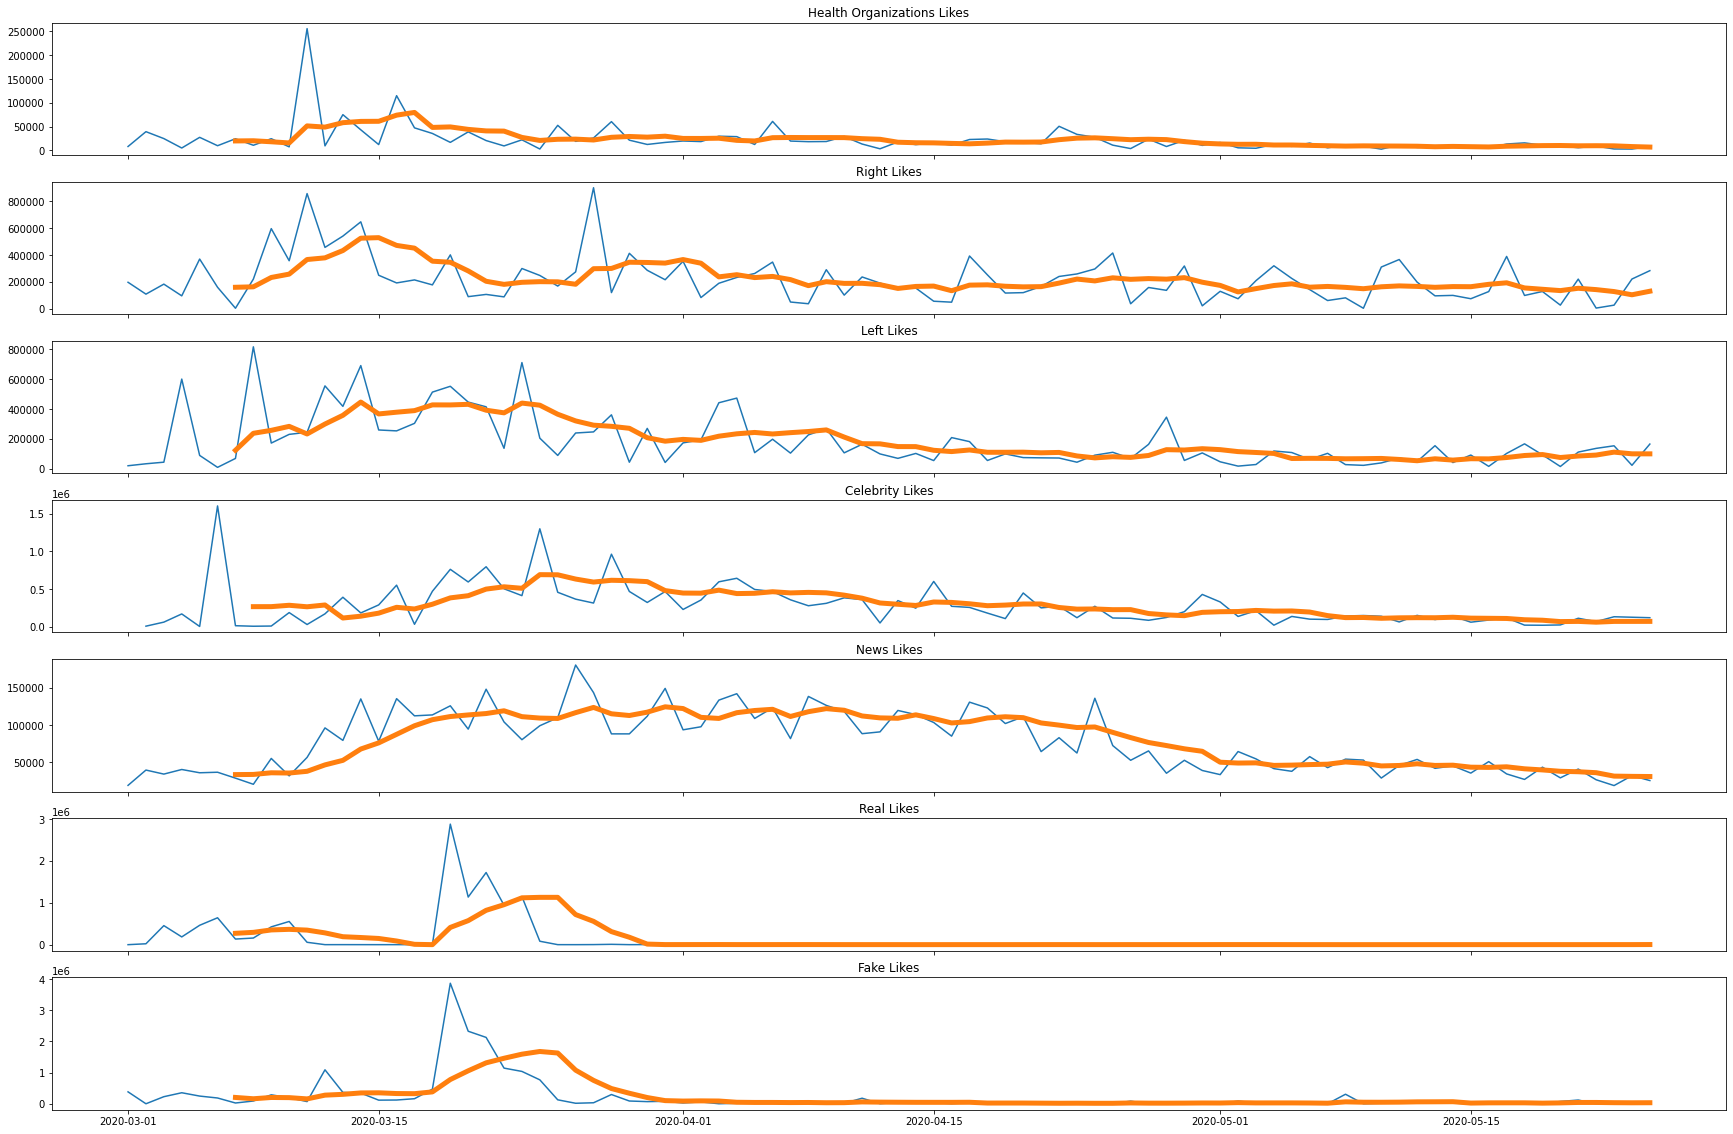

In [11]:
# plot likes

fig, axes = plt.subplots(7, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_likes)
axes[0].plot(health_likes.rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations Likes")

axes[1].plot(right_likes)
axes[1].plot(right_likes.rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Right Likes")

axes[2].plot(left_likes)
axes[2].plot(left_likes.rolling(window=7).mean(), linewidth=5)
axes[2].set_title("Left Likes")

axes[3].plot(celeb_likes)
axes[3].plot(celeb_likes.rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Celebrity Likes")

axes[4].plot(news_likes)
axes[4].plot(news_likes.rolling(window=7).mean(), linewidth=5)
axes[4].set_title("News Likes")

axes[5].plot(real_likes)
axes[5].plot(real_likes.rolling(window=7).mean(), linewidth=5)
axes[5].set_title("Real Likes")

axes[6].plot(fake_likes)
axes[6].plot(fake_likes.rolling(window=7).mean(), linewidth=5)
axes[6].set_title("Fake Likes")

Text(0.5, 1.0, 'Fake retweets')

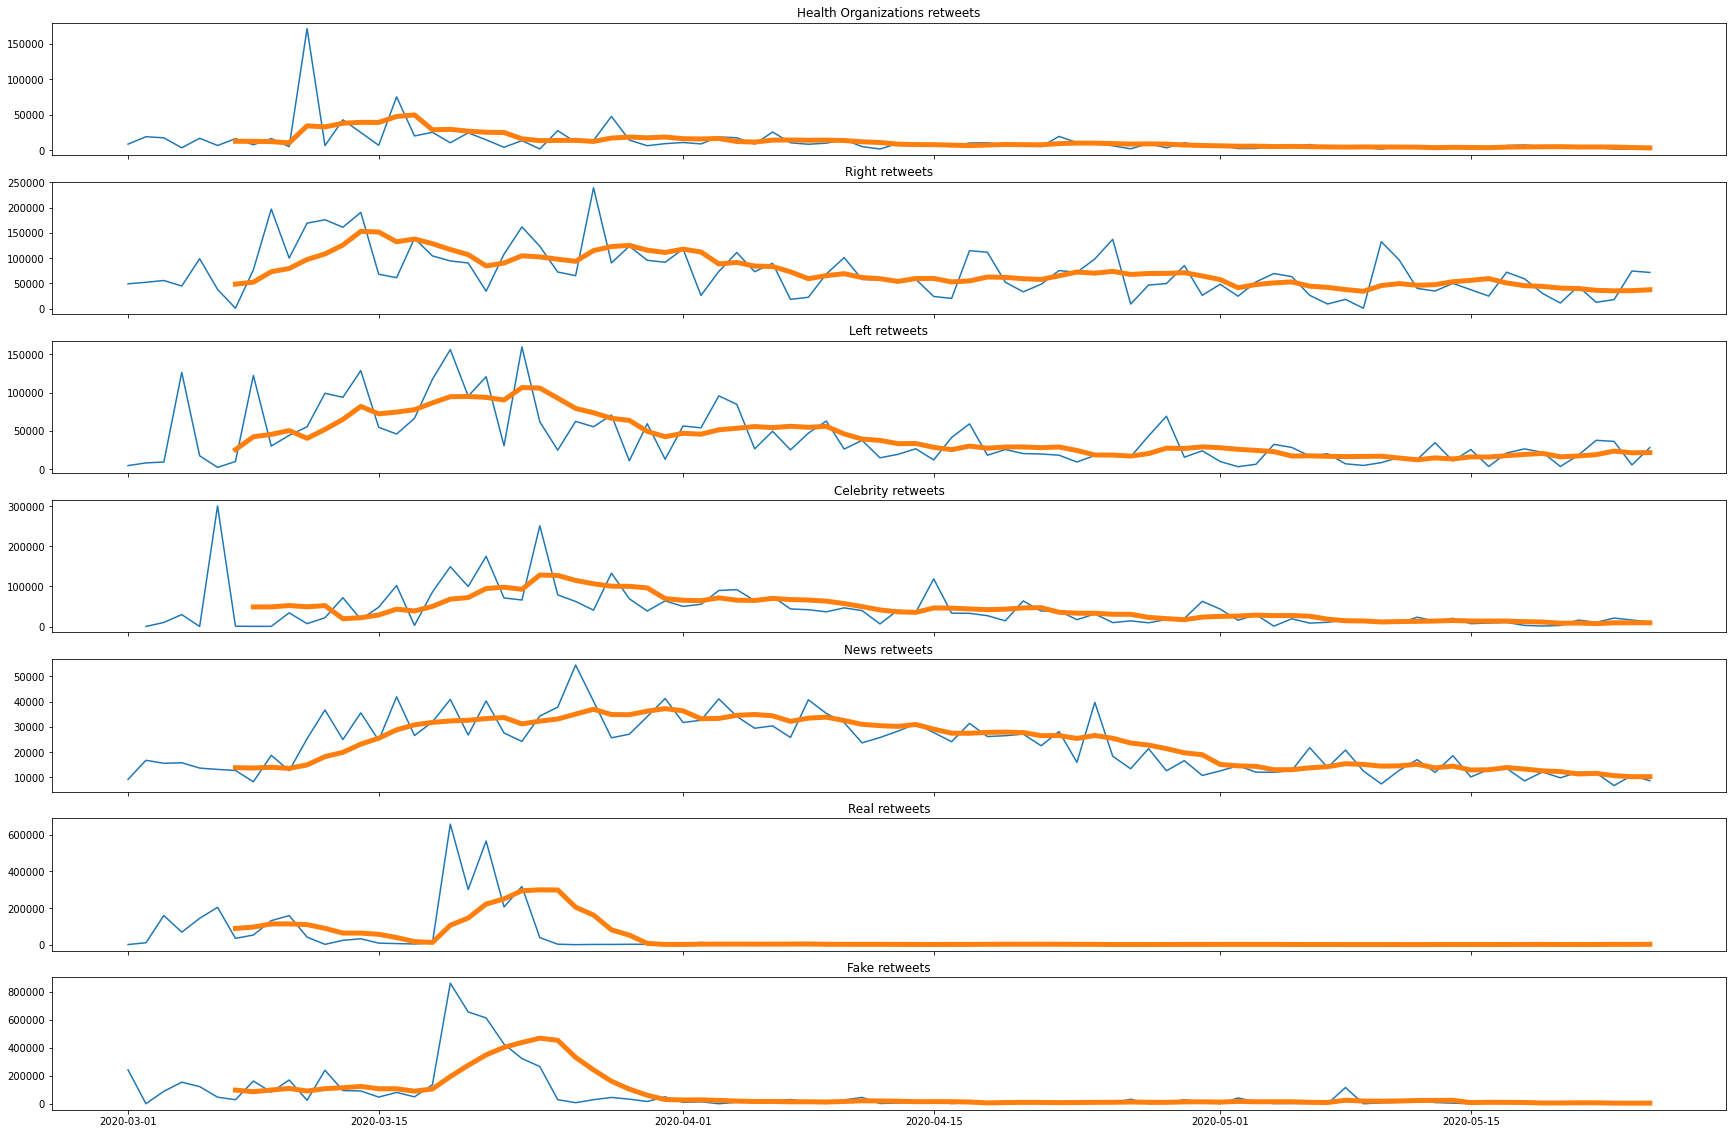

In [12]:
# plot retweets
fig, axes = plt.subplots(7, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_retweets)
axes[0].plot(health_retweets.rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations retweets")

axes[1].plot(right_retweets)
axes[1].plot(right_retweets.rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Right retweets")

axes[2].plot(left_retweets)
axes[2].plot(left_retweets.rolling(window=7).mean(), linewidth=5)
axes[2].set_title("Left retweets")

axes[3].plot(celeb_retweets)
axes[3].plot(celeb_retweets.rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Celebrity retweets")

axes[4].plot(news_retweets)
axes[4].plot(news_retweets.rolling(window=7).mean(), linewidth=5)
axes[4].set_title("News retweets")

axes[5].plot(real_retweets)
axes[5].plot(real_retweets.rolling(window=7).mean(), linewidth=5)
axes[5].set_title("Real retweets")

axes[6].plot(fake_retweets)
axes[6].plot(fake_retweets.rolling(window=7).mean(), linewidth=5)
axes[6].set_title("Fake retweets")


Text(0.5, 1.0, 'Fake Likes')

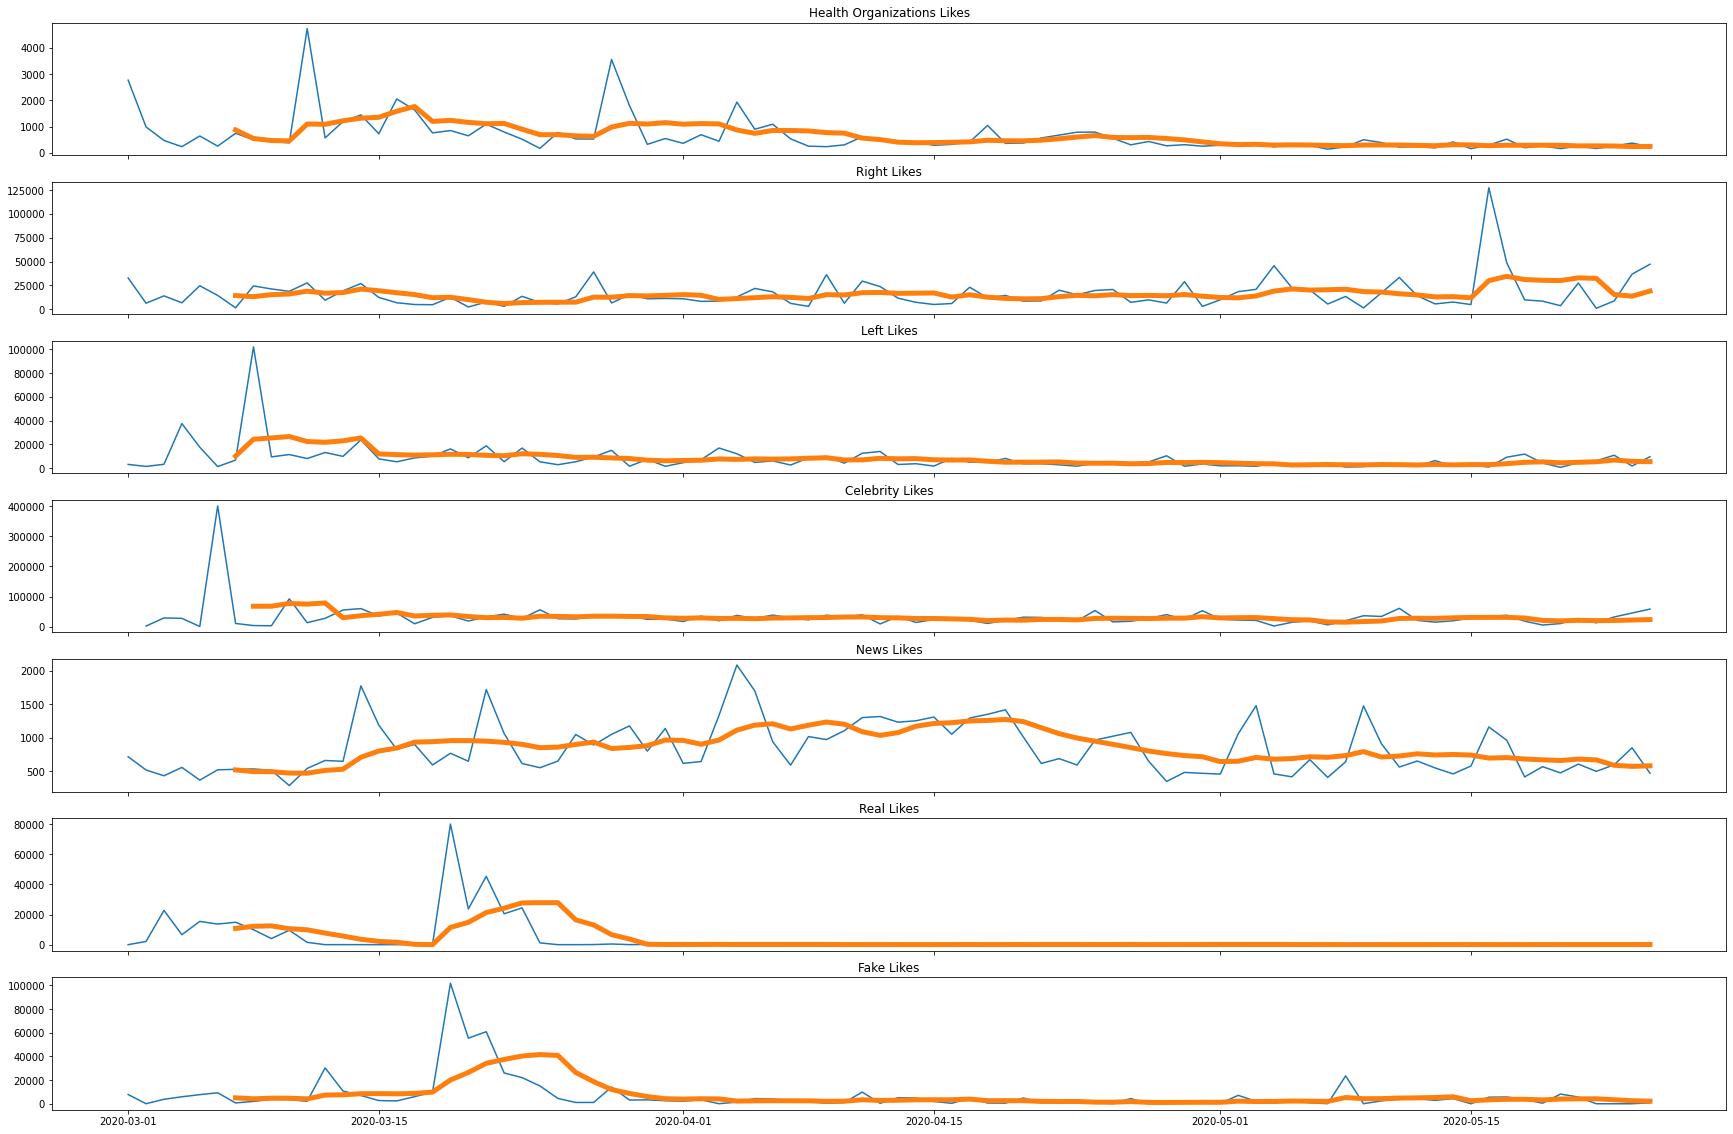

In [13]:
# plot likes divided by number of tweets
healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
right_dates = right_df.sort_values("date", ascending=True)["date"].value_counts()
left_dates = left_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

# plot
fig, axes = plt.subplots(7, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_likes/healthorg_dates)
axes[0].plot((health_likes/healthorg_dates).rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations Likes")

axes[1].plot(right_likes/right_dates)
axes[1].plot((right_likes/right_dates).rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Right Likes")

axes[2].plot(left_likes/left_dates)
axes[2].plot((left_likes/left_dates).rolling(window=7).mean(), linewidth=5)
axes[2].set_title("Left Likes")

axes[3].plot(celeb_likes/celeb_dates)
axes[3].plot((celeb_likes/celeb_dates).rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Celebrity Likes")

axes[4].plot(news_likes/news_dates)
axes[4].plot((news_likes/news_dates).rolling(window=7).mean(), linewidth=5)
axes[4].set_title("News Likes")

axes[5].plot(real_likes/real_tweets)
axes[5].plot((real_likes/real_tweets).rolling(window=7).mean(), linewidth=5)
axes[5].set_title("Real Likes")

axes[6].plot(fake_likes/fake_tweets)
axes[6].plot((fake_likes/fake_tweets).rolling(window=7).mean(), linewidth=5)
axes[6].set_title("Fake Likes")

Text(0.5, 1.0, 'Fake retweets')

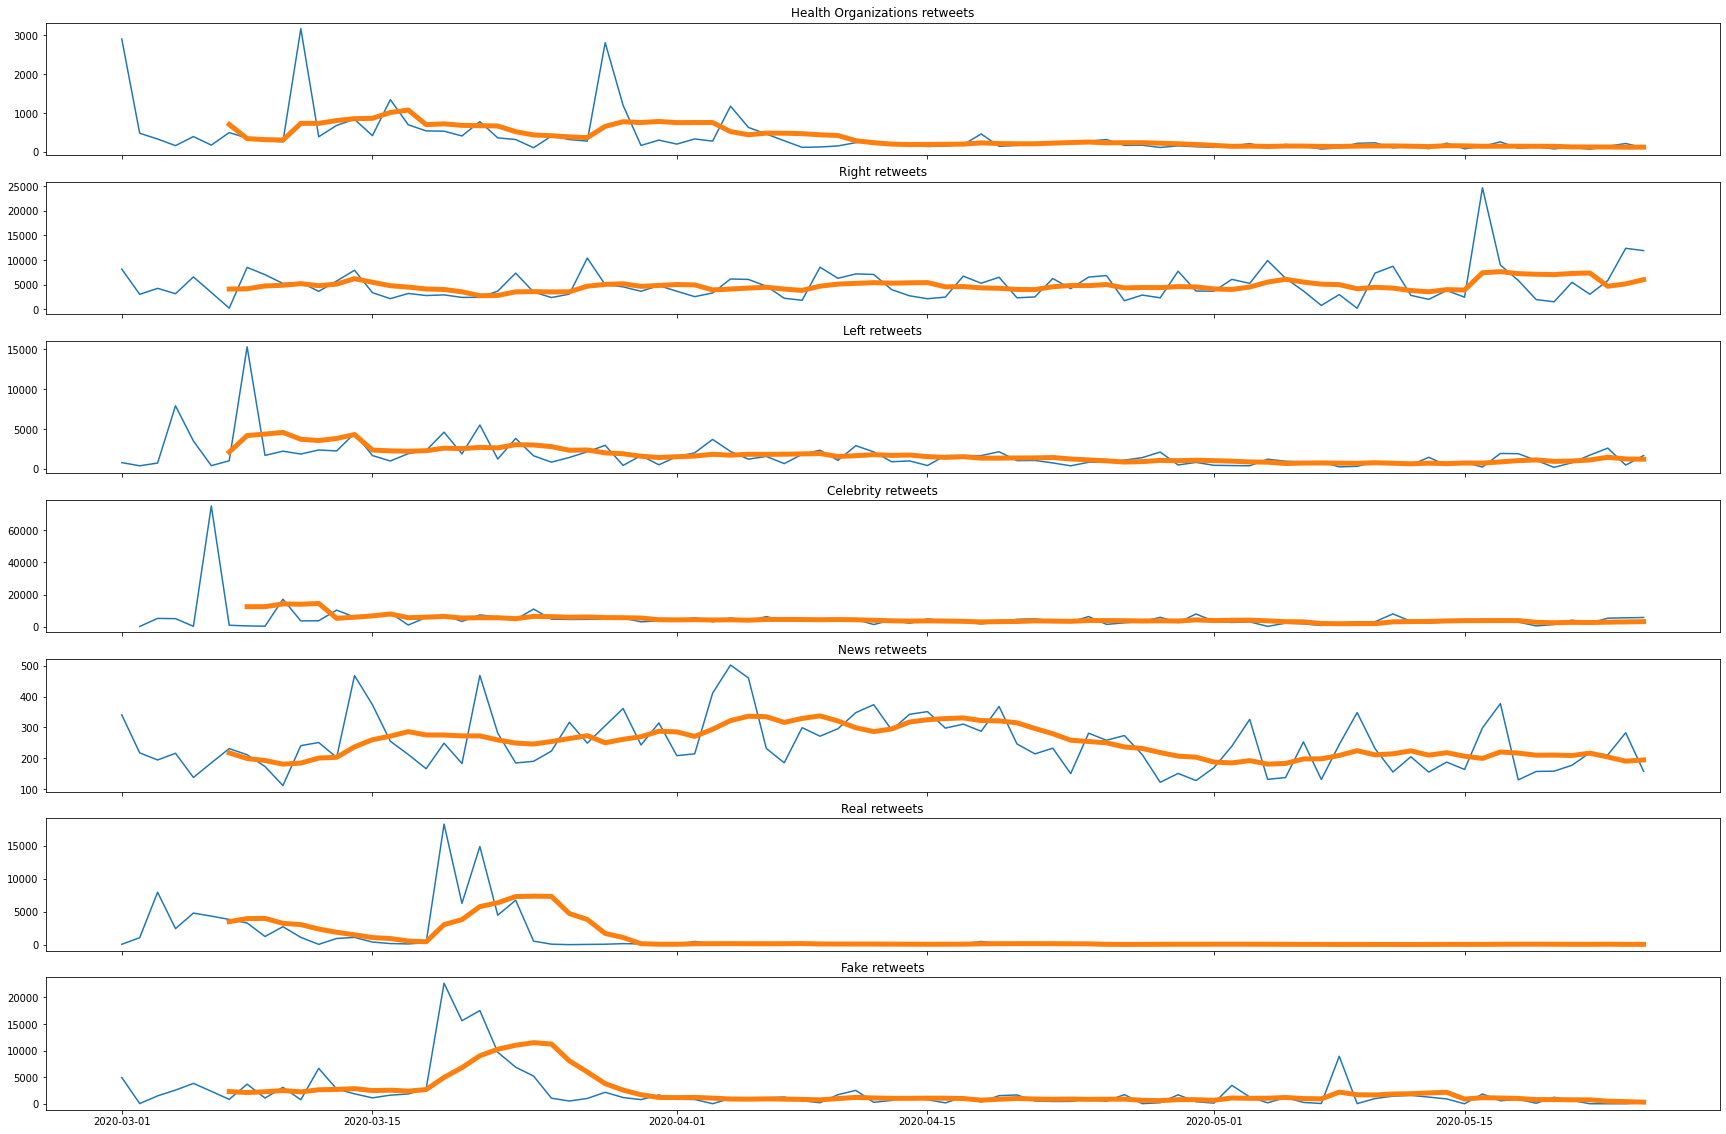

In [14]:
# plot
fig, axes = plt.subplots(7, 1, figsize=[30, 20], sharex=True)
axes[0].plot(health_retweets/healthorg_dates)
axes[0].plot((health_retweets/healthorg_dates).rolling(window=7).mean(), linewidth=5)
axes[0].set_title("Health Organizations retweets")

axes[1].plot(right_retweets/right_dates)
axes[1].plot((right_retweets/right_dates).rolling(window=7).mean(), linewidth=5)
axes[1].set_title("Right retweets")

axes[2].plot(left_retweets/left_dates)
axes[2].plot((left_retweets/left_dates).rolling(window=7).mean(), linewidth=5)
axes[2].set_title("Left retweets")

axes[3].plot(celeb_retweets/celeb_dates)
axes[3].plot((celeb_retweets/celeb_dates).rolling(window=7).mean(), linewidth=5)
axes[3].set_title("Celebrity retweets")

axes[4].plot(news_retweets/news_dates)
axes[4].plot((news_retweets/news_dates).rolling(window=7).mean(), linewidth=5)
axes[4].set_title("News retweets")

axes[5].plot(real_retweets/real_tweets)
axes[5].plot((real_retweets/real_tweets).rolling(window=7).mean(), linewidth=5)
axes[5].set_title("Real retweets")

axes[6].plot(fake_retweets/fake_tweets)
axes[6].plot((fake_retweets/fake_tweets).rolling(window=7).mean(), linewidth=5)
axes[6].set_title("Fake retweets")

In [15]:
from scipy.stats import kendalltau
from scipy.special import comb
import math

def krcc_test(x, y):
    if len(x) == len(y):
        n = len(x)

        # default scipy is tau_b
        krcc = kendalltau(x, y)
        
        # https://github.com/mmhs013/pyMannKendall this also finds the tau and mann-kendall score but it doesnt do what we want
        
        print("KRCC =", krcc[0])

        # The two-sided p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0
        print("p value =", krcc[1])

    else:
        print("inconsistent number of points in x and y")

In [52]:
# bin retweets

health_retweets.index = pd.to_datetime(health_retweets.index)
health_rt_bin = health_retweets.resample('3D').sum()

right_retweets.index = pd.to_datetime(right_retweets.index)
right_rt_bin = right_retweets.resample('3D').sum()

left_retweets.index = pd.to_datetime(left_retweets.index)
left_rt_bin = left_retweets.resample('3D').sum()

celeb_retweets.index = pd.to_datetime(celeb_retweets.index)
celeb_rt_bin = celeb_retweets.resample('3D').sum()

news_retweets.index = pd.to_datetime(news_retweets.index)
news_rt_bin = news_retweets.resample('3D').sum()

fake_retweets.index = pd.to_datetime(fake_retweets.index)
fake_rt_bin = fake_retweets.resample('3D').sum()

real_retweets.index = pd.to_datetime(real_retweets.index)
real_rt_bin = real_retweets.resample('3D').sum()



In [54]:
# bin likes
health_likes.index = pd.to_datetime(health_likes.index)
health_like_bin = health_likes.resample('3D').sum()

right_likes.index = pd.to_datetime(right_likes.index)
right_like_bin = right_likes.resample('3D').sum()

left_likes.index = pd.to_datetime(left_likes.index)
left_like_bin = left_likes.resample('3D').sum()

celeb_likes.index = pd.to_datetime(celeb_likes.index)
celeb_like_bin = celeb_likes.resample('3D').sum()

news_likes.index = pd.to_datetime(news_likes.index)
news_like_bin = news_likes.resample('3D').sum()

fake_likes.index = pd.to_datetime(fake_likes.index)
fake_like_bin = fake_likes.resample('3D').sum()

real_likes.index = pd.to_datetime(real_likes.index)
real_like_bin = real_likes.resample('3D').sum()

In [53]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nNews Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_rt_bin), len(left_rt_bin), len(right_rt_bin), len(celeb_rt_bin), len(news_rt_bin), len(fake_rt_bin), len(real_rt_bin)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
News Outlet Tweets: 	29
Fake Tweets:		29
Real Tweets:		29



In [55]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nNews Outlet Tweets: \t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_like_bin), len(left_like_bin), len(right_like_bin), len(celeb_like_bin), len(news_like_bin), len(fake_like_bin), len(real_like_bin)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
News Outlet Tweets: 	29
Fake Tweets:		29
Real Tweets:		29



In [56]:
# frequency bins

healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
right_df["date"] = pd.to_datetime(right_df["date"])
left_df["date"] = pd.to_datetime(left_df["date"])
news_df["date"] = pd.to_datetime(news_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_dfs["date"] = pd.to_datetime(real_dfs["date"])
fake_dfs["date"] = pd.to_datetime(fake_dfs["date"])

health_bins = pd.Series(index=healthorg_df.date, data=np.array(healthorg_dates.count)).resample('3D').count()
right_bins = pd.Series(index=right_df.date, data=np.array(right_df.count)).resample('3D').count()
left_bins = pd.Series(index=left_df.date, data=np.array(left_df.count)).resample('3D').count()
news_bins = pd.Series(index=news_df.date, data=np.array(news_df.count)).resample('3D').count()
celeb_bins = pd.Series(index=celeb_df.date, data=np.array(celeb_df.count)).resample('3D').count()
real_bins = pd.Series(index=real_dfs.date, data=np.array(real_dfs.count)).resample('3D').count()
fake_bins = pd.Series(index=fake_dfs.date, data=np.array(fake_dfs.count)).resample('3D').count()

In [60]:
print("retweet/frequency")

print("real and health")
krcc_test(real_rt_bin/real_bins, health_rt_bin/health_bins)
print("real and left")
krcc_test(real_rt_bin/real_bins, left_rt_bin/left_bins)
print("real and right")
krcc_test(real_rt_bin/real_bins, right_rt_bin/right_bins)
print("real and celeb")
krcc_test((real_rt_bin/real_bins), celeb_rt_bin/celeb_bins)
print("real and news")
krcc_test(real_rt_bin/real_bins, news_rt_bin/news_bins)

print("\nfake and health")
krcc_test(fake_rt_bin/fake_bins, (health_rt_bin/health_bins))
print("fake and left")
krcc_test(fake_rt_bin/fake_bins, (left_rt_bin/left_bins))
print("fake and right")
krcc_test(fake_rt_bin/fake_bins, (right_rt_bin/right_bins))
print("fake and celeb")
krcc_test(fake_rt_bin/fake_bins, celeb_rt_bin/celeb_bins)
print("fake and news")
krcc_test(fake_rt_bin/fake_bins, (news_rt_bin/news_bins))

retweet/frequency
real and health
KRCC = 0.4532019704433497
p value = 0.00040086528075201835
real and left
KRCC = 0.5615763546798028
p value = 6.684847088961923e-06
real and right
KRCC = -0.039408866995073885
p value = 0.7803827254931988
real and celeb
KRCC = 0.5172413793103448
p value = 4.145954354680948e-05
real and news
KRCC = 0.07881773399014777
p value = 0.5641495892267511

fake and health
KRCC = 0.3251231527093596
p value = 0.013052354736068039
fake and left
KRCC = 0.24630541871921177
p value = 0.06289740929880915
fake and right
KRCC = -0.16748768472906403
p value = 0.21085097172082742
fake and celeb
KRCC = 0.2216748768472906
p value = 0.0952209757990729
fake and news
KRCC = 0.019704433497536943
p value = 0.8964941426465813


In [61]:
print("retweets")
print("real and health")
krcc_test(real_rt_bin, health_rt_bin)
print("real and left")
krcc_test(real_rt_bin, left_rt_bin)
print("real and right")
krcc_test(real_rt_bin, right_rt_bin)
print("real and celeb")
krcc_test((real_rt_bin), celeb_rt_bin)
print("real and news")
krcc_test(real_rt_bin, news_rt_bin)

print("\nfake and health")
krcc_test(fake_rt_bin, health_rt_bin)
print("fake and left")
krcc_test(fake_rt_bin, left_rt_bin)
print("fake and right")
krcc_test(fake_rt_bin, right_rt_bin)
print("fake and celeb")
krcc_test(fake_rt_bin, celeb_rt_bin)
print("fake and news")
krcc_test(fake_rt_bin, news_rt_bin)

retweets
real and health
KRCC = 0.36453201970443344
p value = 0.00510161852025979
real and left
KRCC = 0.49261083743842354
p value = 0.000104085931193692
real and right
KRCC = 0.2758620689655172
p value = 0.036490702034769895
real and celeb
KRCC = 0.3596059113300492
p value = 0.005771816898057707
real and news
KRCC = 0.17733990147783246
p value = 0.18459403185660211

fake and health
KRCC = 0.5172413793103448
p value = 4.145954354680948e-05
fake and left
KRCC = 0.42857142857142855
p value = 0.0008666999185848355
fake and right
KRCC = 0.33004926108374383
p value = 0.011674730549296571
fake and celeb
KRCC = 0.4137931034482758
p value = 0.0013429145225029918
fake and news
KRCC = 0.3399014778325123
p value = 0.009294120204414674


In [62]:
print("likes")
print("real and health")
krcc_test(real_like_bin, health_like_bin)
print("real and left")
krcc_test(real_like_bin, left_like_bin)
print("real and right")
krcc_test(real_like_bin, right_like_bin)
print("real and celeb")
krcc_test((real_like_bin), celeb_like_bin)
print("real and news")
krcc_test(real_like_bin, news_like_bin)

print("\nfake and health")
krcc_test(fake_like_bin, health_like_bin)
print("fake and left")
krcc_test(fake_like_bin, left_like_bin)
print("fake and right")
krcc_test(fake_like_bin, right_like_bin)
print("fake and celeb")
krcc_test(fake_like_bin, celeb_like_bin)
print("fake and news")
krcc_test(fake_like_bin, news_like_bin)

likes
real and health
KRCC = 0.10344827586206895
p value = 0.4452749093115973
real and left
KRCC = 0.24137931034482754
p value = 0.06852679905196186
real and right
KRCC = 0.06403940886699505
p value = 0.6420016019879978
real and celeb
KRCC = 0.09359605911330048
p value = 0.49106753474480574
real and news
KRCC = -0.10837438423645318
p value = 0.4233065625758265

fake and health
KRCC = 0.33497536945812806
p value = 0.010425310470696099
fake and left
KRCC = 0.4729064039408866
p value = 0.00020804791533585217
fake and right
KRCC = 0.07881773399014777
p value = 0.5641495892267511
fake and celeb
KRCC = 0.3251231527093596
p value = 0.013052354736068039
fake and news
KRCC = 0.14285714285714282
p value = 0.28777237927148247


In [63]:
print("like/frequency")

print("real and health")
krcc_test(real_like_bin/real_bins, health_like_bin/health_bins)
print("real and left")
krcc_test(real_like_bin/real_bins, left_like_bin/left_bins)
print("real and right")
krcc_test(real_like_bin/real_bins, right_like_bin/right_bins)
print("real and celeb")
krcc_test((real_like_bin/real_bins), celeb_like_bin/celeb_bins)
print("real and news")
krcc_test(real_like_bin/real_bins, news_like_bin/news_bins)

print("\nfake and health")
krcc_test(fake_like_bin/fake_bins, (health_like_bin/health_bins))
print("fake and left")
krcc_test(fake_like_bin/fake_bins, (left_like_bin/left_bins))
print("fake and right")
krcc_test(fake_like_bin/fake_bins, (right_like_bin/right_bins))
print("fake and celeb")
krcc_test(fake_like_bin/fake_bins, celeb_like_bin/celeb_bins)
print("fake and news")
krcc_test(fake_like_bin/fake_bins, (news_like_bin/news_bins))

like/frequency
real and health
KRCC = 0.17733990147783246
p value = 0.18459403185660211
real and left
KRCC = 0.21674876847290636
p value = 0.10303060532818858
real and right
KRCC = -0.1280788177339901
p value = 0.3418851403961595
real and celeb
KRCC = 0.21182266009852213
p value = 0.11133097071193028
real and news
KRCC = -0.22660098522167485
p value = 0.08788408204248516

fake and health
KRCC = 0.13300492610837436
p value = 0.3231795724216393
fake and left
KRCC = 0.19211822660098518
p value = 0.14978645881707434
fake and right
KRCC = -0.29064039408866993
p value = 0.02724570500361764
fake and celeb
KRCC = 0.05911330049261083
p value = 0.668894784416208
fake and news
KRCC = -0.12315270935960589
p value = 0.36125600024923277
